<a href="https://www.kaggle.com/code/mesutssmn/red-wine-ml-ann-h2o-automl?scriptVersionId=179948220" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:40px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:150%; text-align:left">

<h3 align="center"><font color='#70000' size=150%>Red Wine Quality</font></h3>


<h4 align="left"><font color='#70000' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for regression</li>
    
<li> Some analysis and statistics</li>
    
<li> ML, ANN, AUTOML</li>
    
    
    
<p> Red wine is a type of wine made from dark-colored grape varieties. The color of the wine can range from intense violet, typical of young wines, through to brick red for mature wines and brown for older red wines. The juice from most purple grapes is greenish-white, the red color coming from anthocyan pigments present in the skin of the grape. Much of the red wine production process involves extraction of color and flavor components from the grape skin.</p>
    

<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://www.thespruceeats.com/thmb/1RzqbsX3m-SJR_yFrMhpRwBhkCQ=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/red-wine-is-poured-into-a-glass-from-a-bottle--light-background--1153158143-98320451802c485cb6d7b5437c7fd60a.jpg" alt="Red Wine" width="800">
</div>
</div>
    
    
    

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTINGS </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LOADING DATA </div>

In [3]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


<div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; text-align:center"> 
<p style=" font-size:250% ; text-align:center" > FEATURES </p>



1. **Fixed Acidity:**  Represents the total amount of acids in the wine. Acidity can affect the taste and stability of the wine.

2. **Volatile Acidity:** Indicates the amount of acetic acid in the wine. High levels can lead to an unpleasant vinegar taste.

3. **Citric Acid:** Found in small quantities, citric acid can add freshness and flavor to the wine. It can also act as a preservative.

4. **Residual Sugar:** Refers to the amount of sugar left in the wine after fermentation. Affects the sweetness of the wine; higher levels result in sweeter wines.

5. **Chlorides:** Represents the amount of salt in the wine. Too much chloride can make the wine taste salty or briny.

6. **Free Sulfur Dioxide:** Acts as an antioxidant and preservative. Helps prevent microbial growth and oxidation.

7. **Total Sulfur Dioxide:** Sum of both free and bound forms of sulfur dioxide. Important for wine stability and shelf-life.

8. **Density:** Refers to the mass of the wine per unit volume. Can be an indicator of sugar content or alcohol content.

9. **pH:** Measures the acidity or alkalinity of the wine. pH affects the taste, color, and stability of the wine.

10. **Sulphates:** Sulfur compounds that can act as antioxidants and antimicrobial agents. Can contribute to the wine's flavor and aroma.

11. **Alcohol:** Represents the alcohol content of the wine. Alcohol affects the body, sweetness, and overall balance of the wine.

12. **Quality:** Score between 0 and 10 indicating the quality of the wine. This is the target variable you want to predict based on the input features.

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA INFORMATION AND COLUMN IDENTIFICATION  </div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
df.quality = df.quality-3
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,2
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,2
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,2
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,3
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,2


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1599
Variables: 12
cat_cols: 1
num_cols: 11
cat_but_car: 0
num_but_cat: 1


In [9]:
cat_cols, num_cols, cat_but_car

(['quality'],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 [])

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> VISUALIZATIONS </div>

         quality  Ratio
quality                
2            681 42.589
3            638 39.900
4            199 12.445
1             53  3.315
5             18  1.126
0             10  0.625


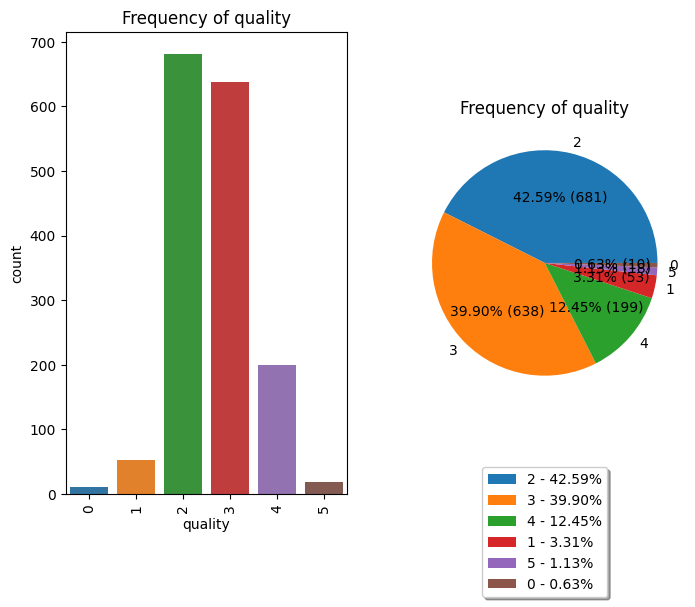

In [10]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

count   1599.000
mean       8.320
std        1.741
min        4.600
5%         6.100
10%        6.500
20%        7.000
30%        7.200
40%        7.600
50%        7.900
60%        8.300
70%        8.900
80%        9.700
90%       10.700
95%       11.800
99%       13.300
max       15.900
Name: fixed acidity, dtype: float64


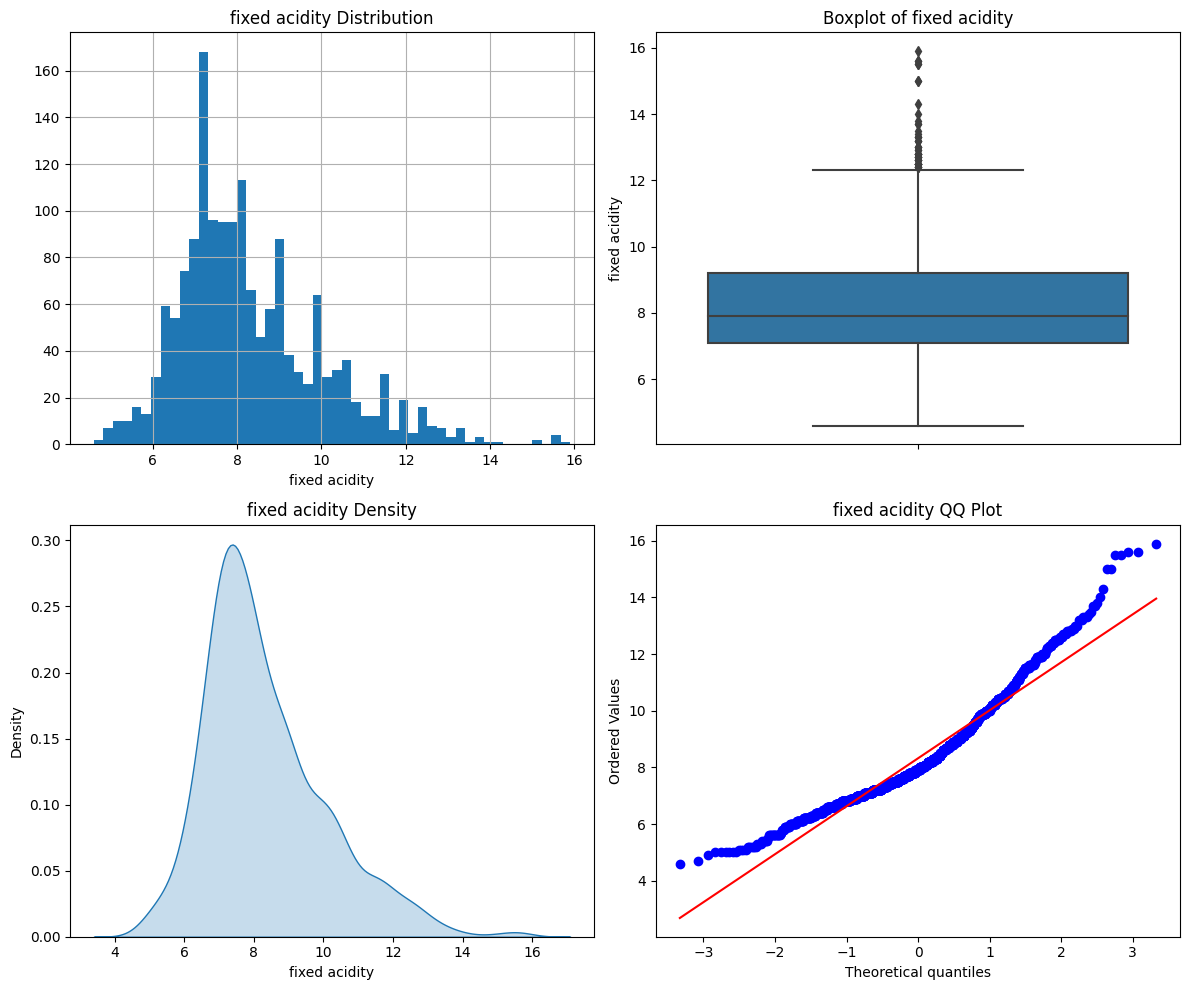

#####################################
count   1599.000
mean       0.528
std        0.179
min        0.120
5%         0.270
10%        0.310
20%        0.370
30%        0.415
40%        0.470
50%        0.520
60%        0.570
70%        0.610
80%        0.660
90%        0.745
95%        0.840
99%        1.020
max        1.580
Name: volatile acidity, dtype: float64


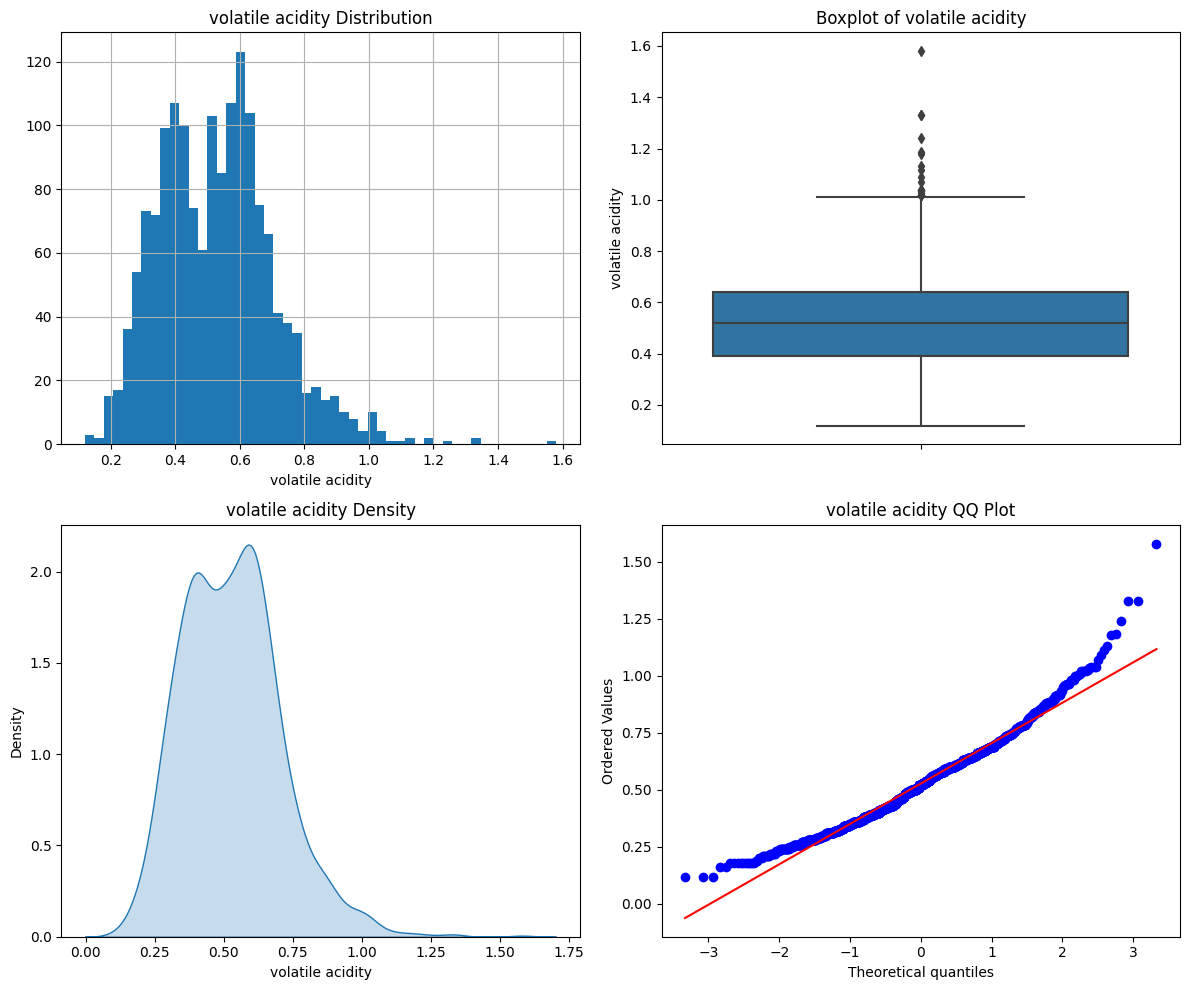

#####################################
count   1599.000
mean       0.271
std        0.195
min        0.000
5%         0.000
10%        0.010
20%        0.070
30%        0.124
40%        0.210
50%        0.260
60%        0.320
70%        0.390
80%        0.460
90%        0.522
95%        0.600
99%        0.700
max        1.000
Name: citric acid, dtype: float64


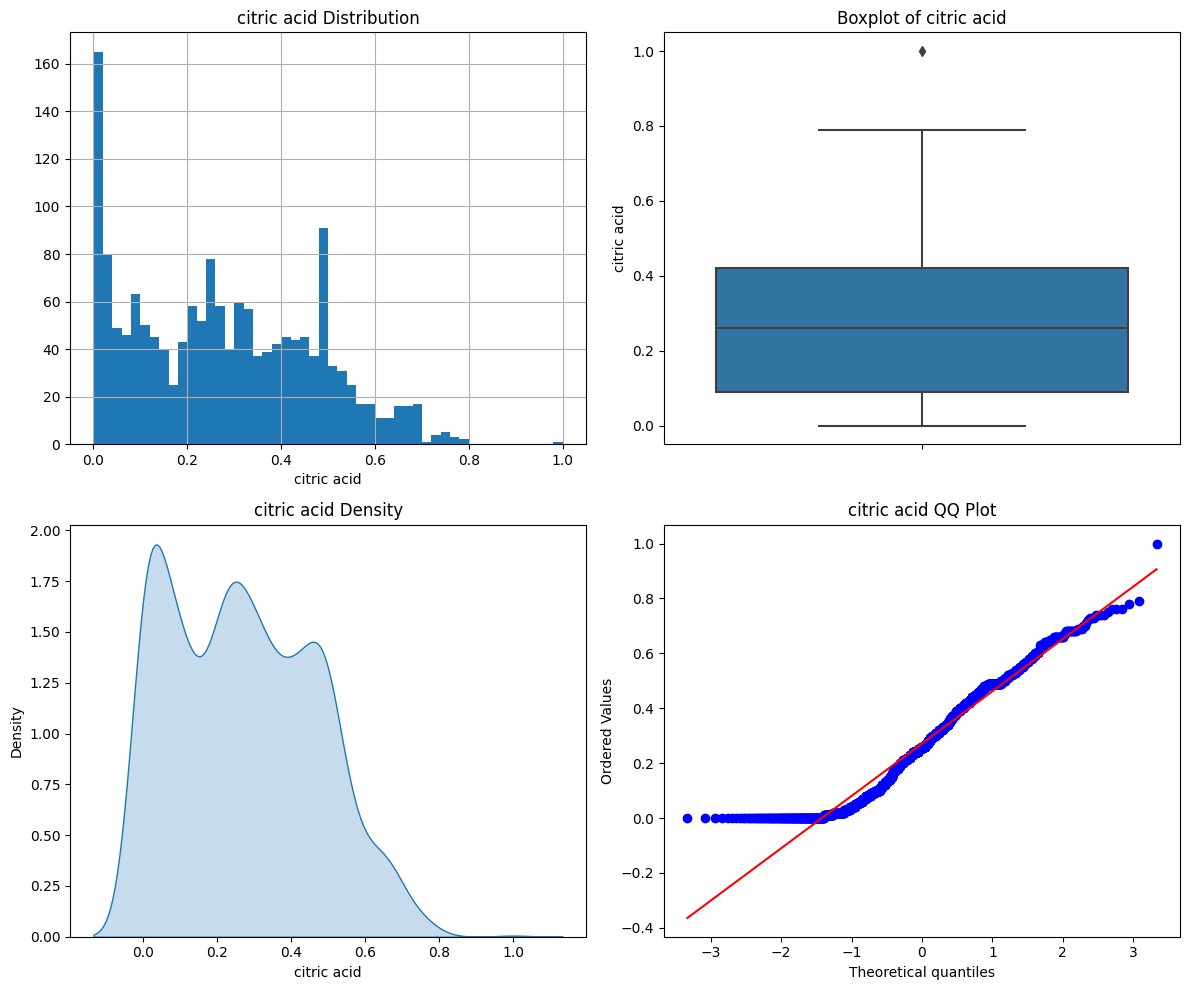

#####################################
count   1599.000
mean       2.539
std        1.410
min        0.900
5%         1.590
10%        1.700
20%        1.800
30%        2.000
40%        2.100
50%        2.200
60%        2.300
70%        2.500
80%        2.700
90%        3.600
95%        5.100
99%        8.306
max       15.500
Name: residual sugar, dtype: float64


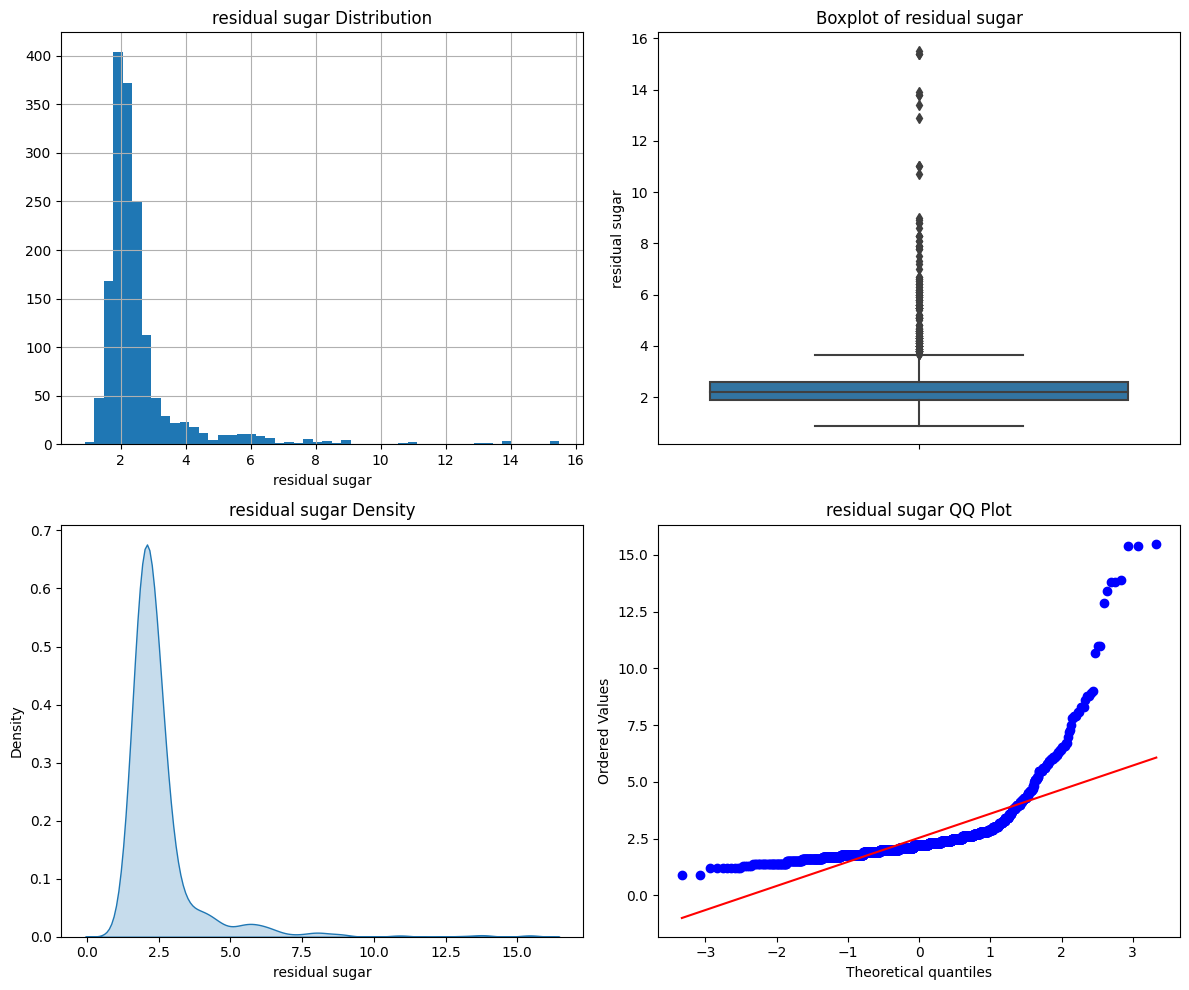

#####################################
count   1599.000
mean       0.087
std        0.047
min        0.012
5%         0.054
10%        0.060
20%        0.067
30%        0.072
40%        0.076
50%        0.079
60%        0.082
70%        0.087
80%        0.094
90%        0.109
95%        0.126
99%        0.360
max        0.611
Name: chlorides, dtype: float64


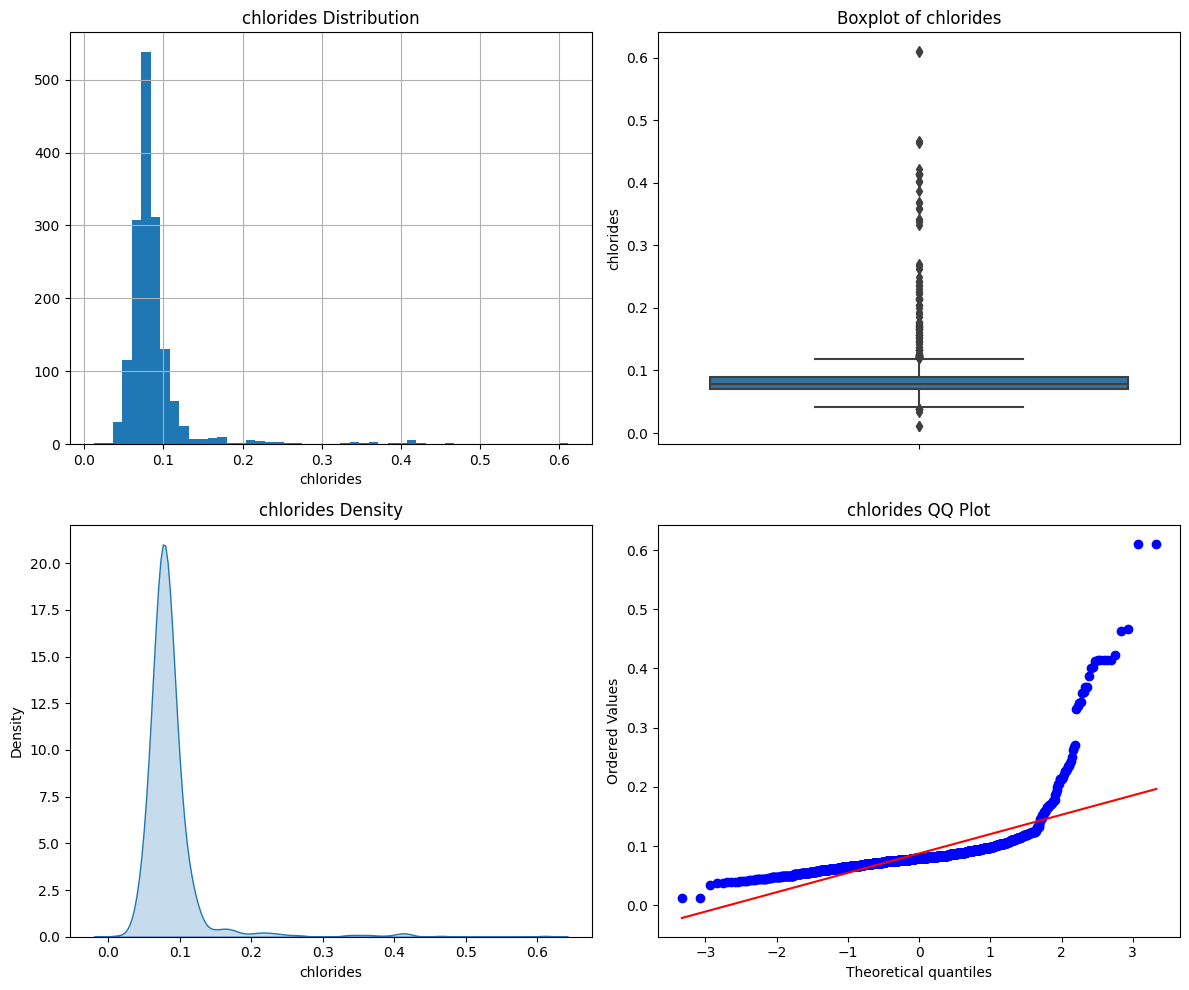

#####################################
count   1599.000
mean      15.875
std       10.460
min        1.000
5%         4.000
10%        5.000
20%        6.000
30%        9.000
40%       11.000
50%       14.000
60%       16.000
70%       19.000
80%       24.000
90%       31.000
95%       35.000
99%       50.020
max       72.000
Name: free sulfur dioxide, dtype: float64


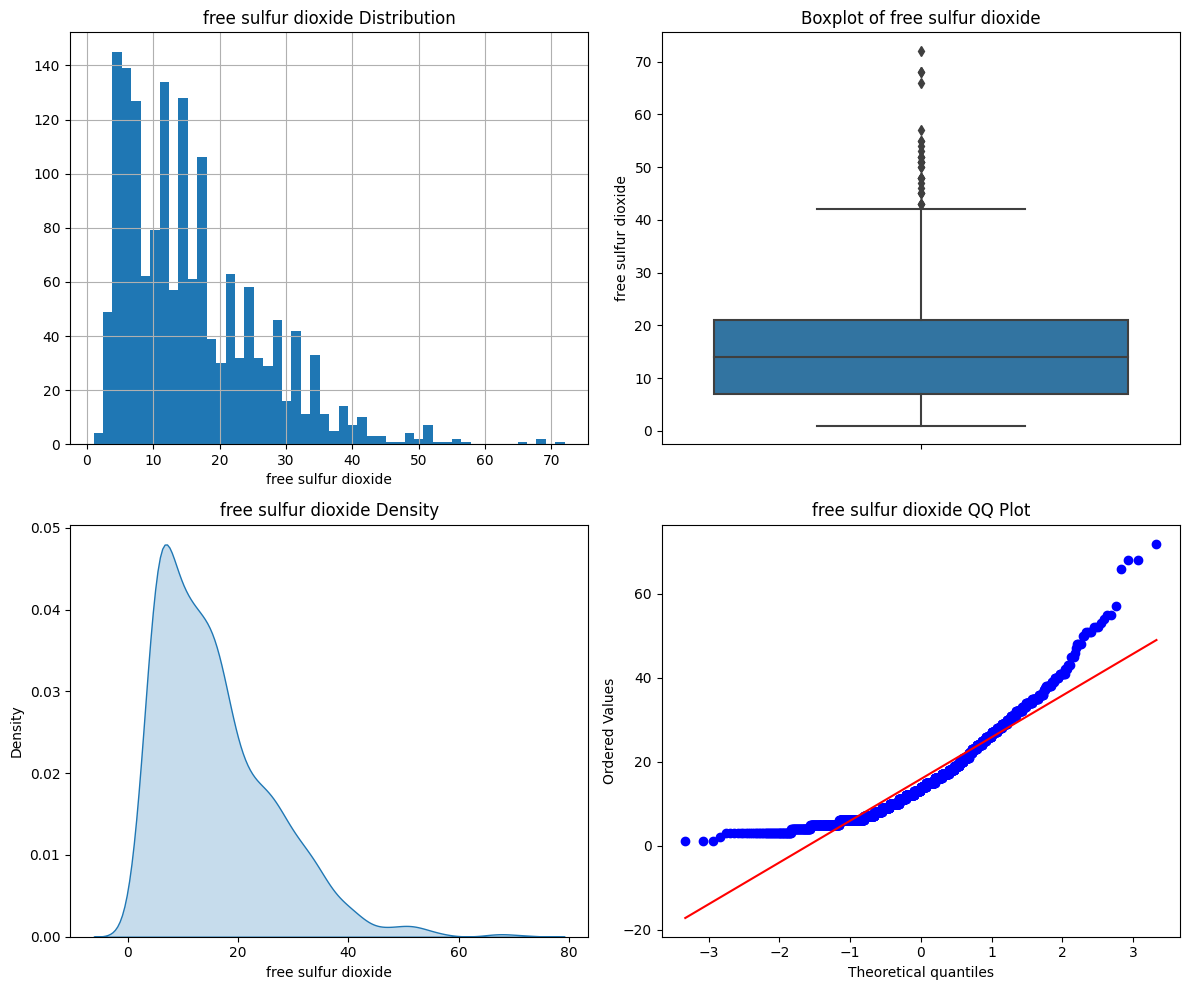

#####################################
count   1599.000
mean      46.468
std       32.895
min        6.000
5%        11.000
10%       14.000
20%       19.000
30%       24.000
40%       30.000
50%       38.000
60%       45.800
70%       55.000
80%       69.000
90%       93.200
95%      112.100
99%      145.000
max      289.000
Name: total sulfur dioxide, dtype: float64


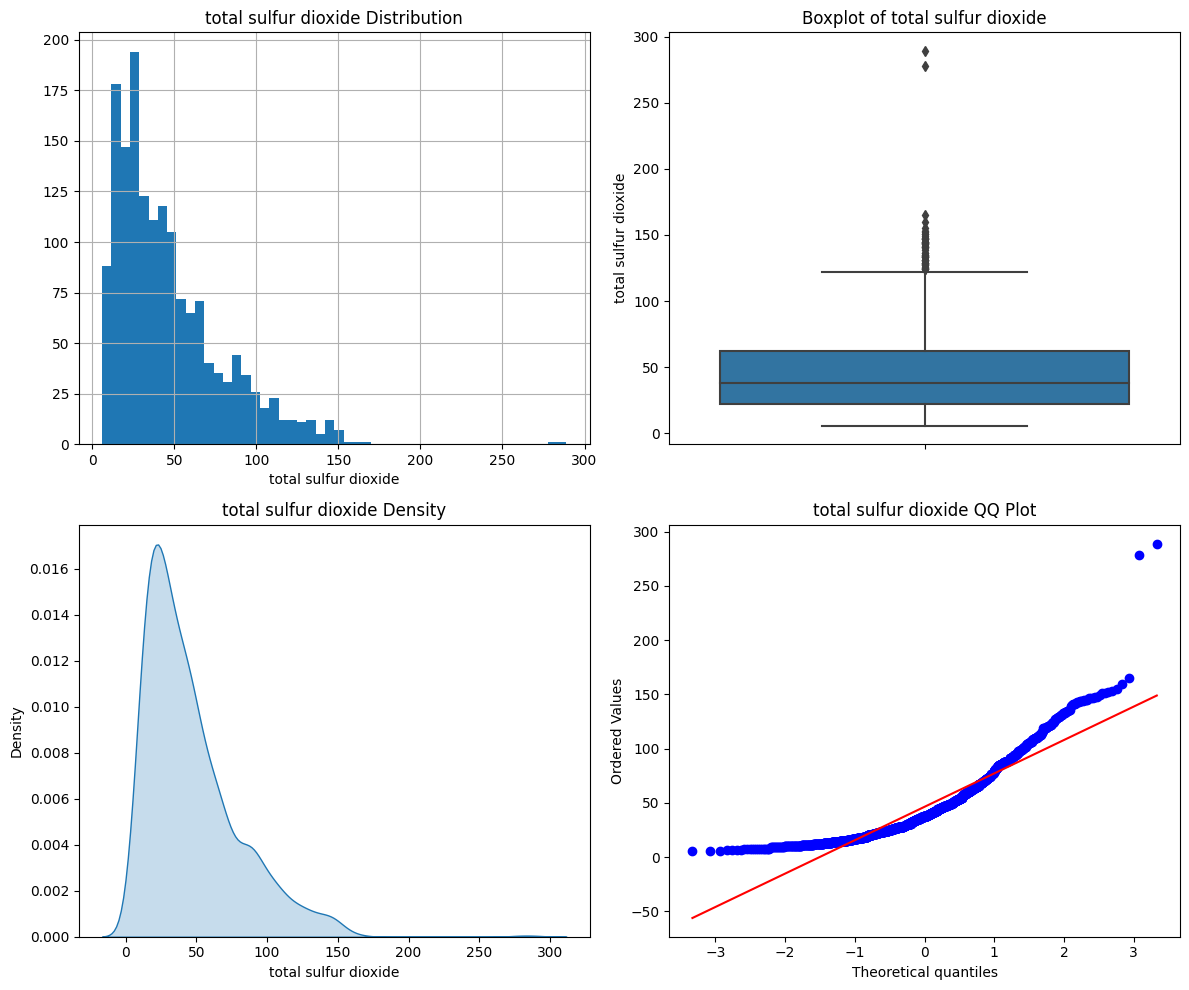

#####################################
count   1599.000
mean       0.997
std        0.002
min        0.990
5%         0.994
10%        0.995
20%        0.995
30%        0.996
40%        0.996
50%        0.997
60%        0.997
70%        0.998
80%        0.998
90%        0.999
95%        1.000
99%        1.002
max        1.004
Name: density, dtype: float64


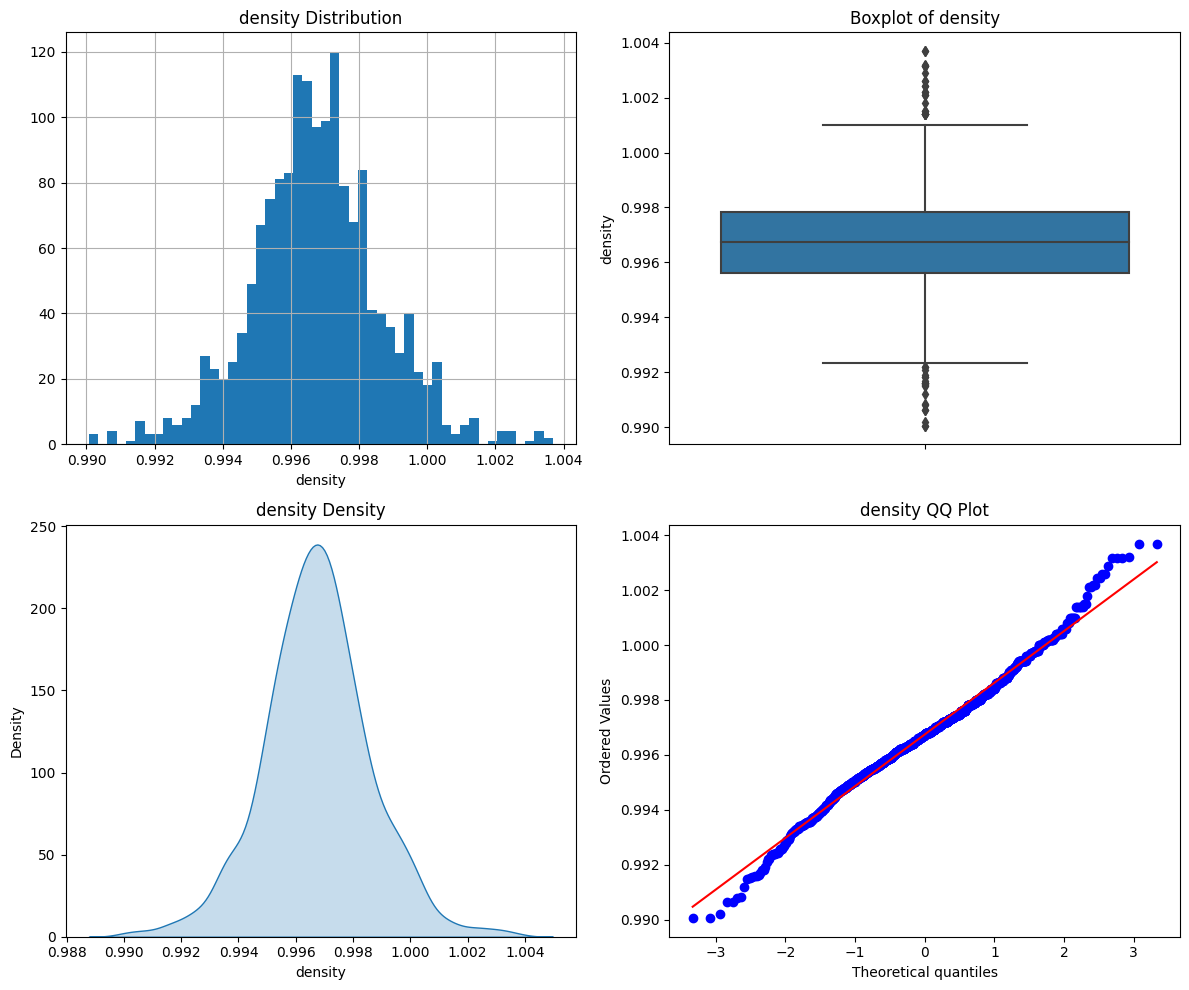

#####################################
count   1599.000
mean       3.311
std        0.154
min        2.740
5%         3.060
10%        3.120
20%        3.180
30%        3.230
40%        3.280
50%        3.310
60%        3.350
70%        3.380
80%        3.424
90%        3.510
95%        3.570
99%        3.700
max        4.010
Name: pH, dtype: float64


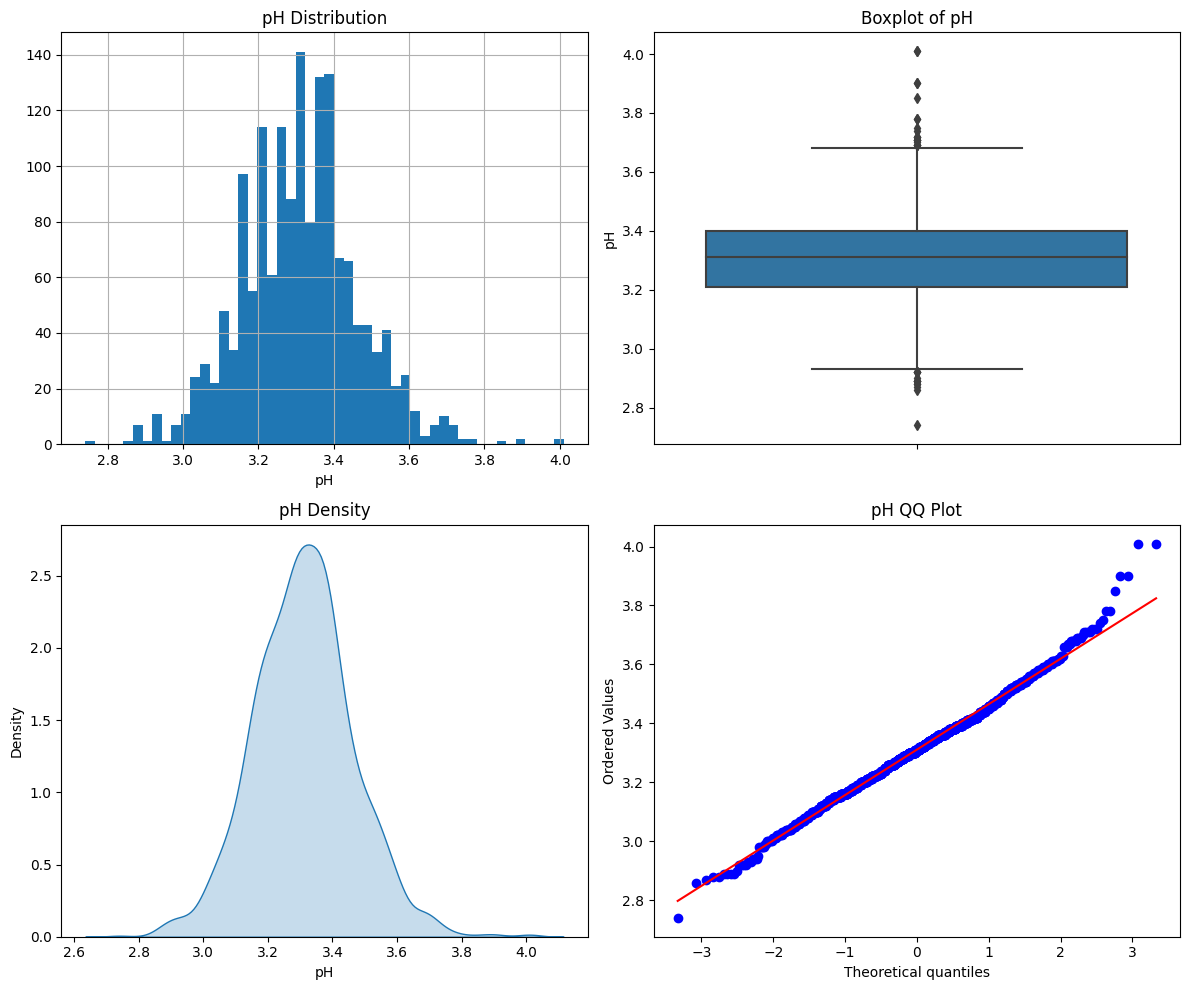

#####################################
count   1599.000
mean       0.658
std        0.170
min        0.330
5%         0.470
10%        0.500
20%        0.540
30%        0.564
40%        0.590
50%        0.620
60%        0.650
70%        0.700
80%        0.760
90%        0.850
95%        0.930
99%        1.260
max        2.000
Name: sulphates, dtype: float64


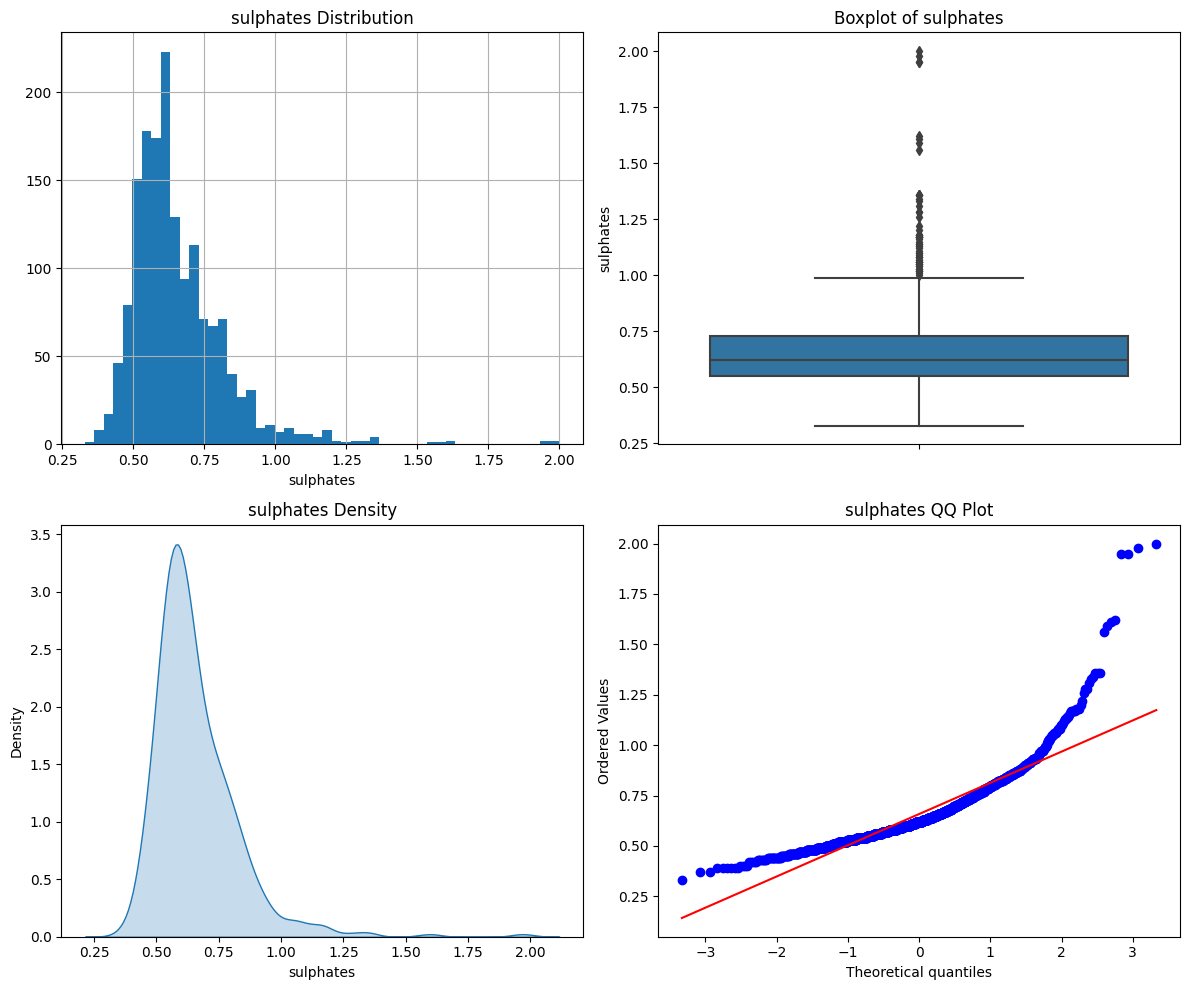

#####################################
count   1599.000
mean      10.423
std        1.066
min        8.400
5%         9.200
10%        9.300
20%        9.500
30%        9.600
40%        9.900
50%       10.200
60%       10.500
70%       10.900
80%       11.300
90%       12.000
95%       12.500
99%       13.400
max       14.900
Name: alcohol, dtype: float64


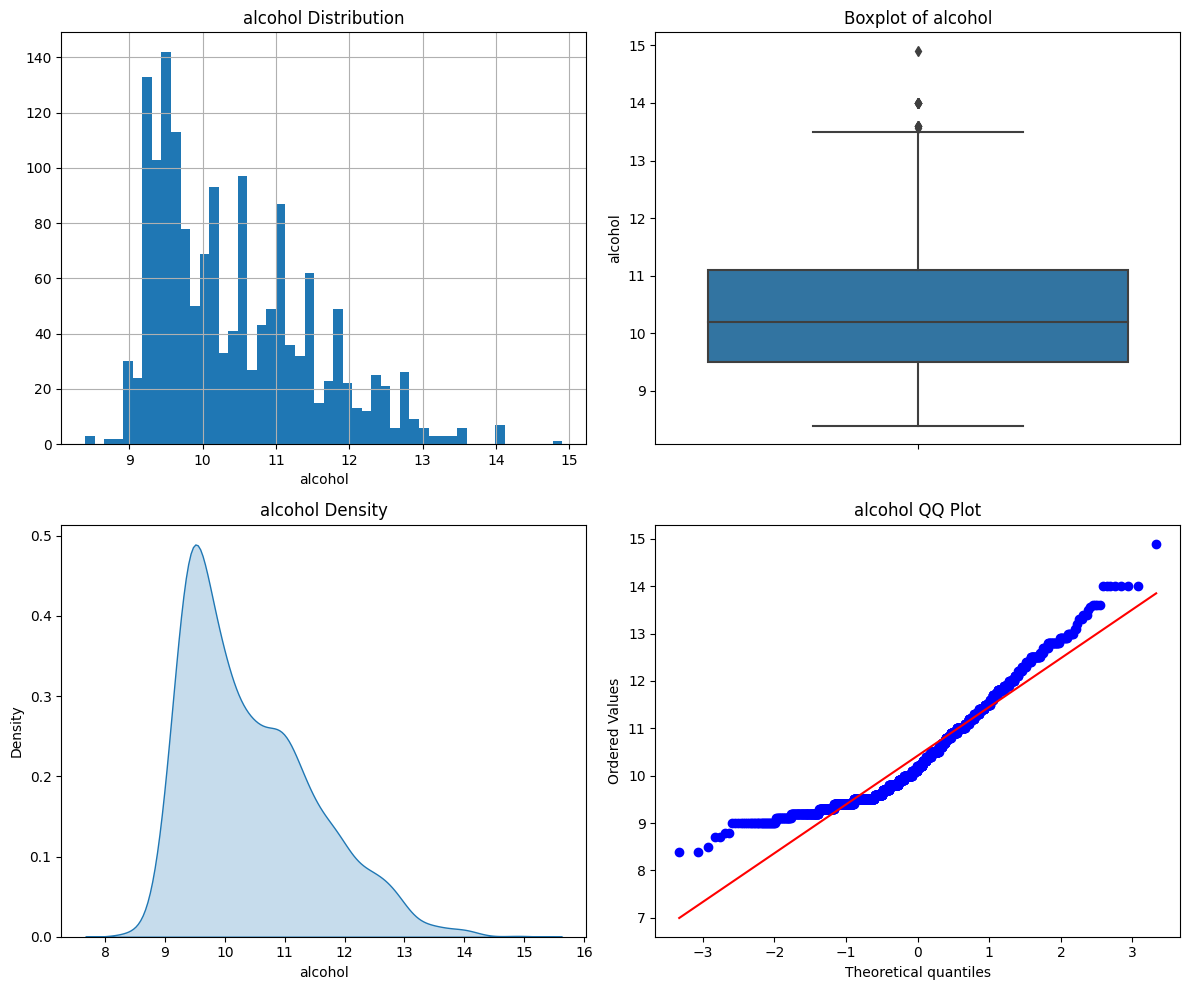

#####################################


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Distribution')
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], shade=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Density')
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + ' QQ Plot')
        
        plt.tight_layout()
        plt.show(block=True)
        
    print("#####################################")

for col in num_cols:
    num_summary(df, col, plot=True)


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA ANALYSIS </div>

In [12]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "quality", col)

         fixed acidity
quality               
0                8.360
1                7.779
2                8.167
3                8.347
4                8.872
5                8.567


         volatile acidity
quality                  
0                   0.885
1                   0.694
2                   0.577
3                   0.497
4                   0.404
5                   0.423


         citric acid
quality             
0              0.171
1              0.174
2              0.244
3              0.274
4              0.375
5              0.391


         residual sugar
quality                
0                 2.635
1                 2.694
2                 2.529
3                 2.477
4                 2.721
5                 2.578


         chlorides
quality           
0            0.122
1            0.091
2            0.093
3            0.085
4            0.077
5            0.068


         free sulfur dioxide
quality                     
0                     11.000

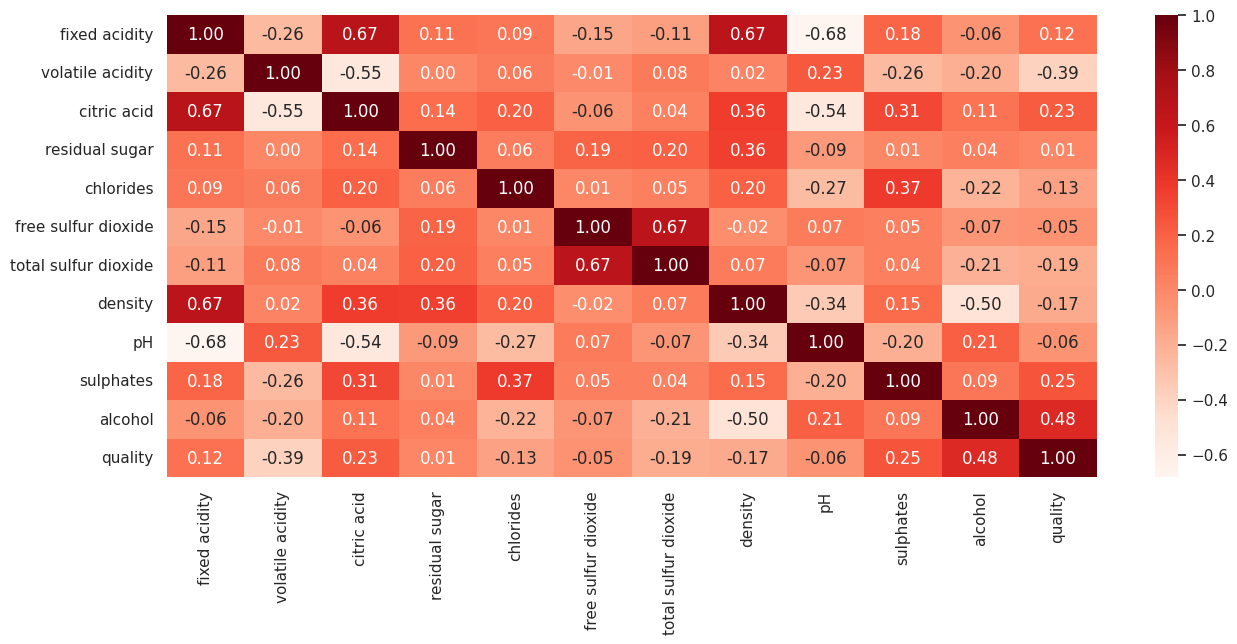

In [13]:
corr = df.corr()
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f")
plt.show()

In [14]:
y = df["quality"]
X = df.drop("quality", axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [16]:
rf_model.score(X_train, y_train)

1.0

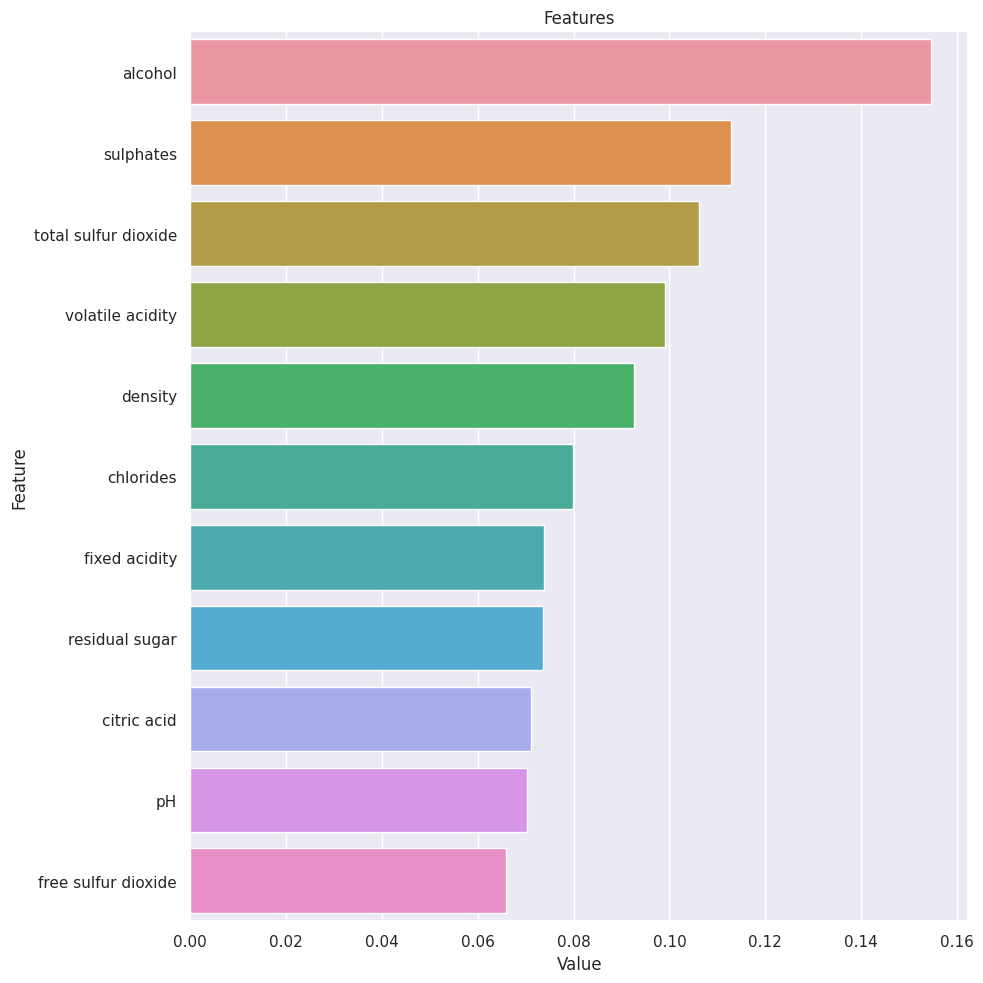

In [17]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

In [18]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [19]:
for col in df.columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

fixed acidity False
volatile acidity False
citric acid False
residual sugar True
chlorides True
free sulfur dioxide False
total sulfur dioxide True
density False
pH False
sulphates True
alcohol False
quality False


In [20]:
for col in df.columns:
    print(col, check_outlier(df, col))

fixed acidity False
volatile acidity False
citric acid False
residual sugar False
chlorides False
free sulfur dioxide False
total sulfur dioxide False
density False
pH False
sulphates False
alcohol False
quality False


In [21]:
df.columns = [col.upper() for col in df.columns]

df.head()

,FIXED ACIDITY,VOLATILE ACIDITY,CITRIC ACID,RESIDUAL SUGAR,CHLORIDES,FREE SULFUR DIOXIDE,TOTAL SULFUR DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,2
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,2
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,2
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,3
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,2


In [22]:
df.QUALITY.unique()

array([2, 3, 4, 1, 5, 0])

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURE EXTRACTION </div>

In [23]:
df['TOTAL ACIDITY'] = df['FIXED ACIDITY'] + df['VOLATILE ACIDITY'] + df['CITRIC ACID']
df['SULFUR DIOXIDE RATIO'] = df['FREE SULFUR DIOXIDE'] / df['TOTAL SULFUR DIOXIDE']
df['CHLORIDE DENSITY'] = df['CHLORIDES'] / df['DENSITY']
df['SUGAR TO ACIDITY RATIO'] = df['RESIDUAL SUGAR'] / df['TOTAL ACIDITY']
df['ALCOHOL DENSITY RATIO'] = df['ALCOHOL'] / df['DENSITY']
df['PH BALANCE'] = df['PH'] * df['FIXED ACIDITY']
df['SULPHATES TO TOTAL ACIDITY RATIO'] = df['SULPHATES'] / df['TOTAL ACIDITY']
df['RESIDUAL SUGAR TO PH RATIO'] = df['RESIDUAL SUGAR'] / df['PH']
df['FREE SULFUR DIOXIDE TO TOTAL ACIDITY RATIO'] = df['FREE SULFUR DIOXIDE'] / df['TOTAL ACIDITY']
df['DENSITY TO PH RATIO'] = df['DENSITY'] / df['PH']
df['ALCOHOL TO SULPHATES RATIO'] = df['ALCOHOL'] / df['SULPHATES']
df['CHLORIDES TO RESIDUAL SUGAR RATIO'] = df['CHLORIDES'] / df['RESIDUAL SUGAR']
df['VOLATILE ACIDITY TO FIXED ACIDITY RATIO'] = df['VOLATILE ACIDITY'] / df['FIXED ACIDITY']
df['RESIDUAL SUGAR TO TOTAL SULFUR DIOXIDE RATIO'] = df['RESIDUAL SUGAR'] / df['TOTAL SULFUR DIOXIDE']
df['TOTAL SULFUR DIOXIDE TO DENSITY RATIO'] = df['TOTAL SULFUR DIOXIDE'] / df['DENSITY']
#df['QUALITY CATEGORY'] = df['QUALITY'].apply(lambda x: 'low' if x <= 2 else ('medium' if x == 3 else 'high'))

In [24]:
#df = pd.get_dummies(df, columns=["QUALITY CATEGORY"], drop_first=True)
#df[["QUALITY CATEGORY_low","QUALITY CATEGORY_medium"]] = df[["QUALITY CATEGORY_low","QUALITY CATEGORY_medium"]].astype(int)

In [25]:
df.head()

,FIXED ACIDITY,VOLATILE ACIDITY,CITRIC ACID,RESIDUAL SUGAR,CHLORIDES,FREE SULFUR DIOXIDE,TOTAL SULFUR DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY,TOTAL ACIDITY,SULFUR DIOXIDE RATIO,CHLORIDE DENSITY,SUGAR TO ACIDITY RATIO,ALCOHOL DENSITY RATIO,PH BALANCE,SULPHATES TO TOTAL ACIDITY RATIO,RESIDUAL SUGAR TO PH RATIO,FREE SULFUR DIOXIDE TO TOTAL ACIDITY RATIO,DENSITY TO PH RATIO,ALCOHOL TO SULPHATES RATIO,CHLORIDES TO RESIDUAL SUGAR RATIO,VOLATILE ACIDITY TO FIXED ACIDITY RATIO,RESIDUAL SUGAR TO TOTAL SULFUR DIOXIDE RATIO,TOTAL SULFUR DIOXIDE TO DENSITY RATIO
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,2,8.100,0.324,0.076,0.235,9.421,25.974,0.069,0.541,1.358,0.284,16.786,0.040,0.095,0.056,34.075
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,2,8.680,0.373,0.098,0.300,9.831,24.960,0.078,0.812,2.880,0.311,14.412,0.038,0.113,0.039,67.215
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,2,8.600,0.278,0.092,0.267,9.829,25.428,0.076,0.706,1.744,0.306,15.077,0.040,0.097,0.043,54.162
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,3,12.040,0.283,0.075,0.158,9.820,35.392,0.048,0.601,1.412,0.316,16.897,0.039,0.025,0.032,60.120
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,2,8.100,0.324,0.076,0.235,9.421,25.974,0.069,0.541,1.358,0.284,16.786,0.040,0.095,0.056,34.075


In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1599
Variables: 27
cat_cols: 1
num_cols: 26
cat_but_car: 0
num_but_cat: 1


In [27]:
y = df["QUALITY"]
X = df.drop("QUALITY", axis=1)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> STATISTICS </div>

In [28]:
results = sm.OLS(y, X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                QUALITY   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1162.
Date:                Sun, 26 May 2024   Prob (F-statistic):                        0.00
Time:                        23:59:27   Log-Likelihood:                         -1517.3
No. Observations:                1599   AIC:                                      3085.
Df Residuals:                    1574   BIC:                                      3219.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> SCALING </div>

In [29]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,FIXED ACIDITY,VOLATILE ACIDITY,CITRIC ACID,RESIDUAL SUGAR,CHLORIDES,FREE SULFUR DIOXIDE,TOTAL SULFUR DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY,TOTAL ACIDITY,SULFUR DIOXIDE RATIO,CHLORIDE DENSITY,SUGAR TO ACIDITY RATIO,ALCOHOL DENSITY RATIO,PH BALANCE,SULPHATES TO TOTAL ACIDITY RATIO,RESIDUAL SUGAR TO PH RATIO,FREE SULFUR DIOXIDE TO TOTAL ACIDITY RATIO,DENSITY TO PH RATIO,ALCOHOL TO SULPHATES RATIO,CHLORIDES TO RESIDUAL SUGAR RATIO,VOLATILE ACIDITY TO FIXED ACIDITY RATIO,RESIDUAL SUGAR TO TOTAL SULFUR DIOXIDE RATIO,TOTAL SULFUR DIOXIDE TO DENSITY RATIO
0,0.248,0.397,0.000,0.106,0.288,0.141,0.109,0.568,0.606,0.178,0.154,2,0.240,0.360,0.287,0.086,0.157,0.285,0.204,0.080,0.113,0.313,0.374,0.184,0.417,0.048,0.108
1,0.283,0.521,0.000,0.180,0.387,0.338,0.237,0.494,0.362,0.271,0.215,2,0.290,0.420,0.386,0.129,0.220,0.251,0.256,0.170,0.251,0.545,0.294,0.172,0.511,0.031,0.236
2,0.283,0.438,0.040,0.148,0.360,0.197,0.186,0.509,0.409,0.248,0.215,2,0.283,0.306,0.359,0.108,0.220,0.267,0.240,0.134,0.148,0.497,0.316,0.184,0.432,0.035,0.185
3,0.584,0.110,0.560,0.106,0.283,0.225,0.210,0.582,0.331,0.194,0.215,3,0.575,0.312,0.282,0.035,0.218,0.599,0.085,0.100,0.118,0.582,0.378,0.181,0.059,0.024,0.208
4,0.248,0.397,0.000,0.106,0.288,0.141,0.109,0.568,0.606,0.178,0.154,2,0.240,0.360,0.287,0.086,0.157,0.285,0.204,0.080,0.113,0.313,0.374,0.184,0.417,0.048,0.108


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
unique, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 1
Value: 1, Count: 17
Value: 2, Count: 195
Value: 3, Count: 200
Value: 4, Count: 61
Value: 5, Count: 6


In [32]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")

Accuracy: 0.67


    Value                                       Feature
15  0.085                         ALCOHOL DENSITY RATIO
10  0.074                                       ALCOHOL
1   0.050                              VOLATILE ACIDITY
9   0.048                                     SULPHATES
23  0.048       VOLATILE ACIDITY TO FIXED ACIDITY RATIO
25  0.044         TOTAL SULFUR DIOXIDE TO DENSITY RATIO
21  0.042                    ALCOHOL TO SULPHATES RATIO
12  0.040                          SULFUR DIOXIDE RATIO
6   0.039                          TOTAL SULFUR DIOXIDE
7   0.039                                       DENSITY
17  0.039              SULPHATES TO TOTAL ACIDITY RATIO
24  0.039  RESIDUAL SUGAR TO TOTAL SULFUR DIOXIDE RATIO
14  0.032                        SUGAR TO ACIDITY RATIO
13  0.032                              CHLORIDE DENSITY
19  0.032    FREE SULFUR DIOXIDE TO TOTAL ACIDITY RATIO
2   0.032                                   CITRIC ACID
22  0.031             CHLORIDES TO RESIDUAL SUGA

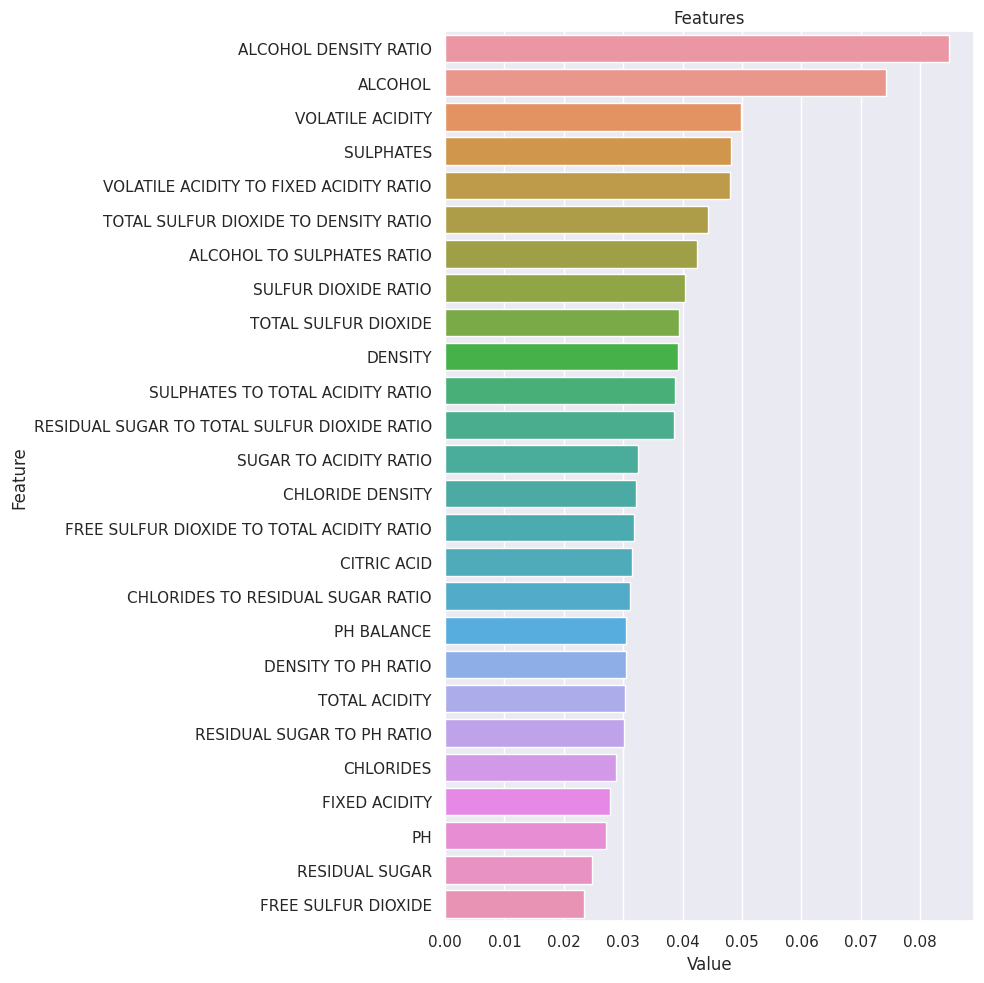

In [33]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML MODELLING </div>

In [34]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVC', SVC()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier(verbose=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False))]

In [35]:
acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"ACC: {round(acc, 4)} ({name}) ")

ACC: 0.5943 (LR) 
ACC: 0.4969 (KNN) 
ACC: 0.5881 (CART) 
ACC: 0.6641 (RF) 
ACC: 0.4933 (SVC) 
ACC: 0.656 (GBM) 
ACC: 0.6417 (XGBoost) 
ACC: 0.6595 (LightGBM) 
ACC: 0.6649 (CatBoost) 


## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LIGHTGBM </div>

In [36]:
lgbm = LGBMClassifier(verbose = -1)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

lgbm_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
lgbm_accuracy

66.88

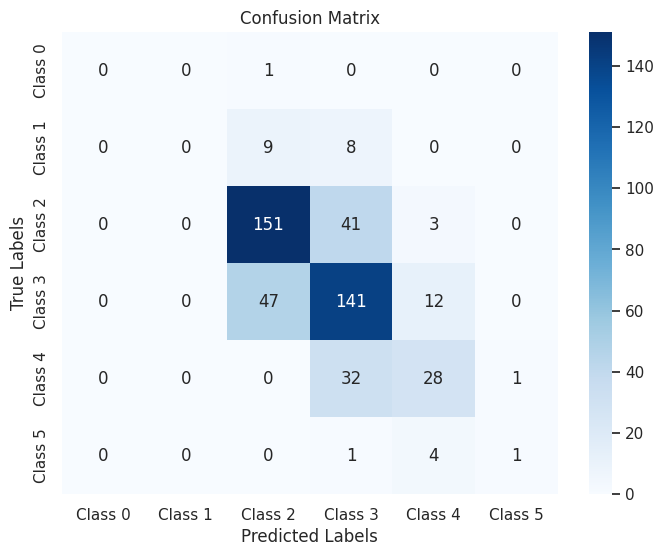

In [37]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

    Value                                       Feature
15   1089                         ALCOHOL DENSITY RATIO
23   1041       VOLATILE ACIDITY TO FIXED ACIDITY RATIO
1     951                              VOLATILE ACIDITY
12    918                          SULFUR DIOXIDE RATIO
19    883    FREE SULFUR DIOXIDE TO TOTAL ACIDITY RATIO
14    847                        SUGAR TO ACIDITY RATIO
24    835  RESIDUAL SUGAR TO TOTAL SULFUR DIOXIDE RATIO
22    830             CHLORIDES TO RESIDUAL SUGAR RATIO
9     755                                     SULPHATES
7     743                                       DENSITY
17    722              SULPHATES TO TOTAL ACIDITY RATIO
21    708                    ALCOHOL TO SULPHATES RATIO
2     602                                   CITRIC ACID
20    599                           DENSITY TO PH RATIO
10    594                                       ALCOHOL
13    565                              CHLORIDE DENSITY
6     564                          TOTAL SULFUR 

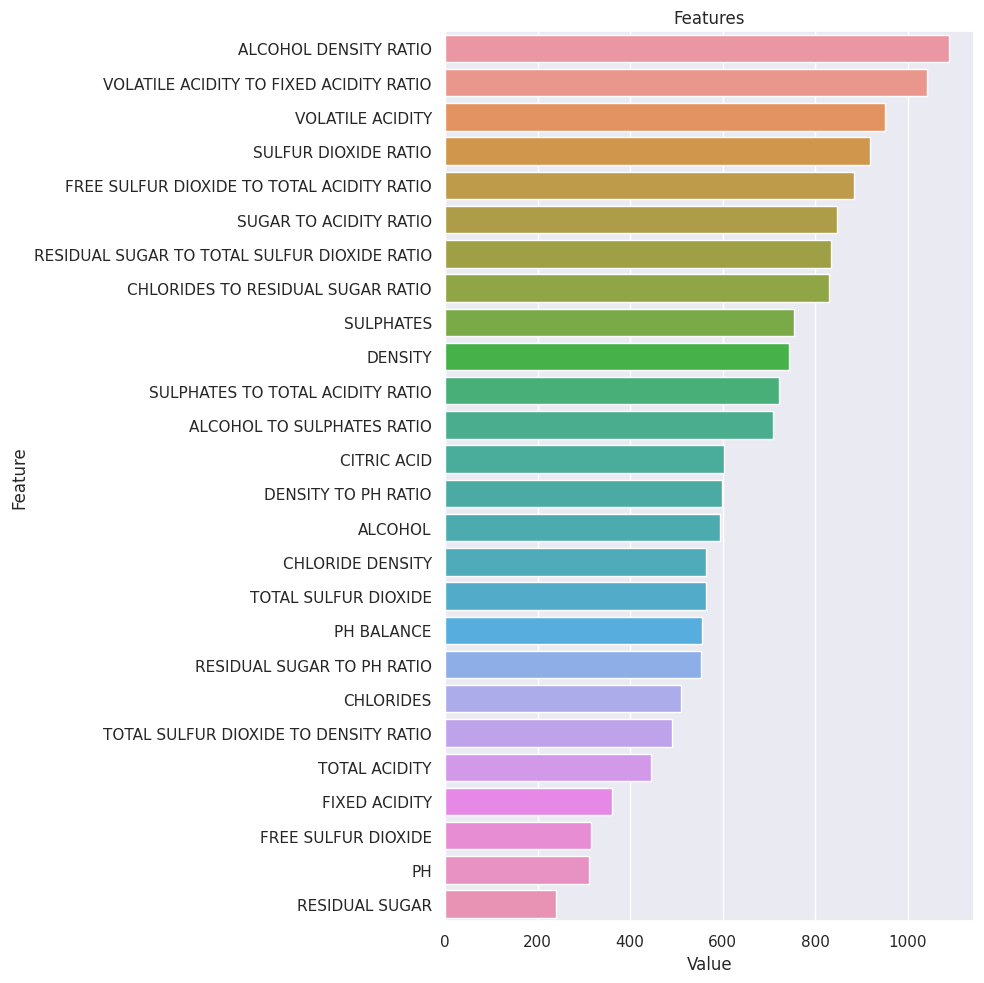

In [38]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgbm_model, X)

### <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> CATBOOST </div>

In [39]:
cat = CatBoostClassifier(learning_rate = 0.05, verbose =False)
cat_model = cat.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

cat_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
cat_accuracy

66.88

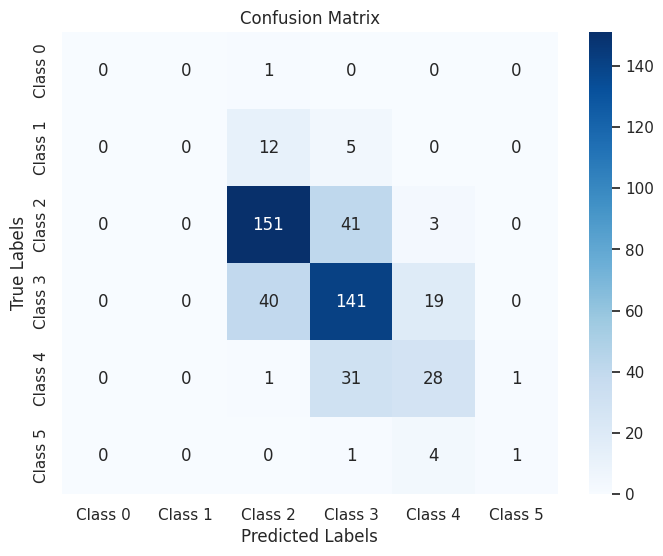

In [40]:
cm = confusion_matrix(y_test, y_pred_cat)

class_labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

    Value                                       Feature
15  9.666                         ALCOHOL DENSITY RATIO
12  6.517                          SULFUR DIOXIDE RATIO
9   6.077                                     SULPHATES
1   5.813                              VOLATILE ACIDITY
21  5.662                    ALCOHOL TO SULPHATES RATIO
13  5.488                              CHLORIDE DENSITY
7   4.482                                       DENSITY
14  4.436                        SUGAR TO ACIDITY RATIO
23  4.282       VOLATILE ACIDITY TO FIXED ACIDITY RATIO
10  4.256                                       ALCOHOL
25  4.065         TOTAL SULFUR DIOXIDE TO DENSITY RATIO
2   4.005                                   CITRIC ACID
19  3.826    FREE SULFUR DIOXIDE TO TOTAL ACIDITY RATIO
24  3.769  RESIDUAL SUGAR TO TOTAL SULFUR DIOXIDE RATIO
17  3.639              SULPHATES TO TOTAL ACIDITY RATIO
22  3.505             CHLORIDES TO RESIDUAL SUGAR RATIO
20  3.346                           DENSITY TO P

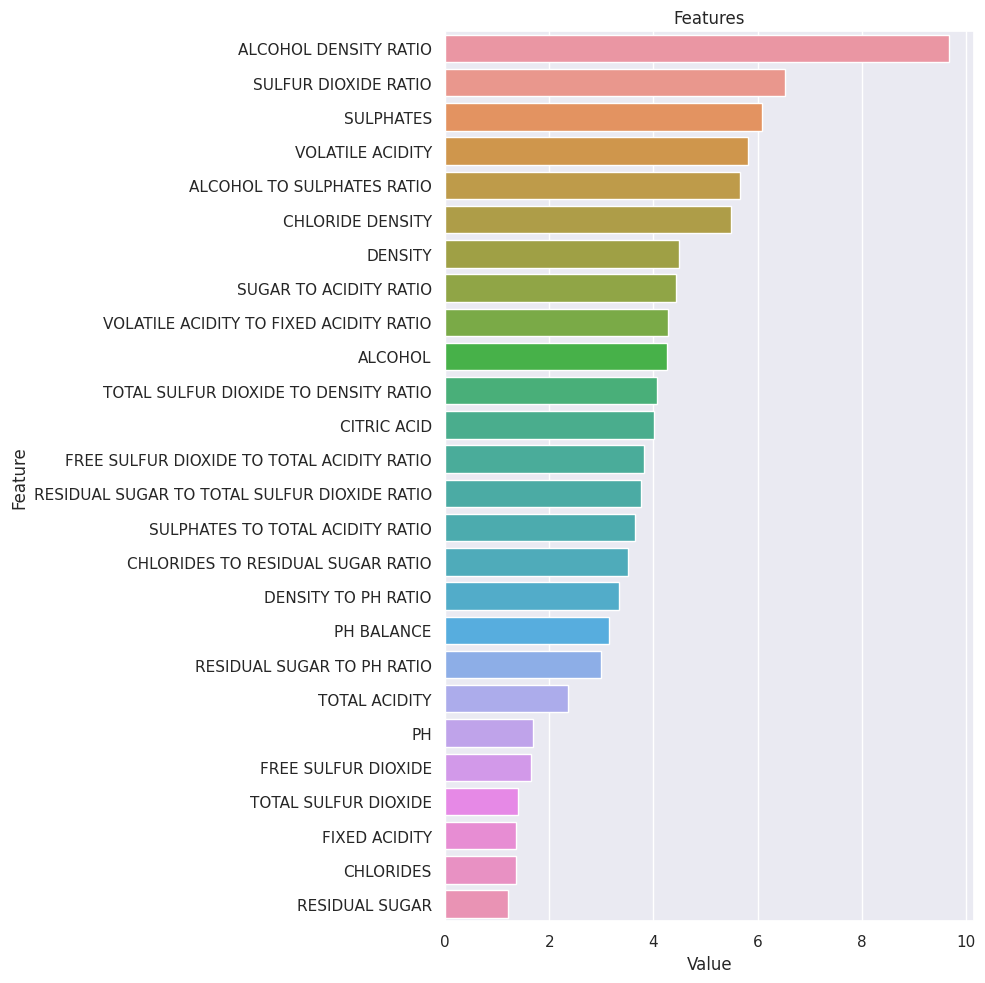

In [41]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(cat_model, X)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ANN MODELLING </div>

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

2024-05-27 00:01:06.700571: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 00:01:06.700678: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 00:01:06.814615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [43]:
X_train.shape[1]

26

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation="elu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(512, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(512, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(32, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(8, activation="elu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(6, activation="softmax")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,830 (1.91 MB)

 Trainable params: 500,830 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/200
20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2567 - loss: 4.5583  

I0000 00:00:1716768090.918919     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716768090.939947     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 376ms/step - accuracy: 0.2761 - loss: 4.4691 - val_accuracy: 0.4167 - val_loss: 3.8541
Epoch 2/200
22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3551 - loss: 4.0670 

W0000 00:00:1716768103.680153     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3502 - loss: 4.0464 - val_accuracy: 0.4167 - val_loss: 3.6190
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3637 - loss: 3.8356 - val_accuracy: 0.4000 - val_loss: 3.4247
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3585 - loss: 3.6119 - val_accuracy: 0.5229 - val_loss: 3.2173
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3941 - loss: 3.4265 - val_accuracy: 0.4896 - val_loss: 3.0522
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3984 - loss: 3.2113 - val_accuracy: 0.5042 - val_loss: 2.8994
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4140 - loss: 3.0606 - val_accuracy: 0.5021 - val_loss: 2.7629
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3995 - loss: 2.9032 - val_accuracy: 0.5271 - val_loss: 2.6279
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4415 - loss: 2.8001 - val_accuracy: 0.5146 - val_loss: 2.5

In [46]:
loss_and_metrics = model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5771 - loss: 1.0222 
Loss =  1.0298374891281128
Accuracy =  0.5520833134651184


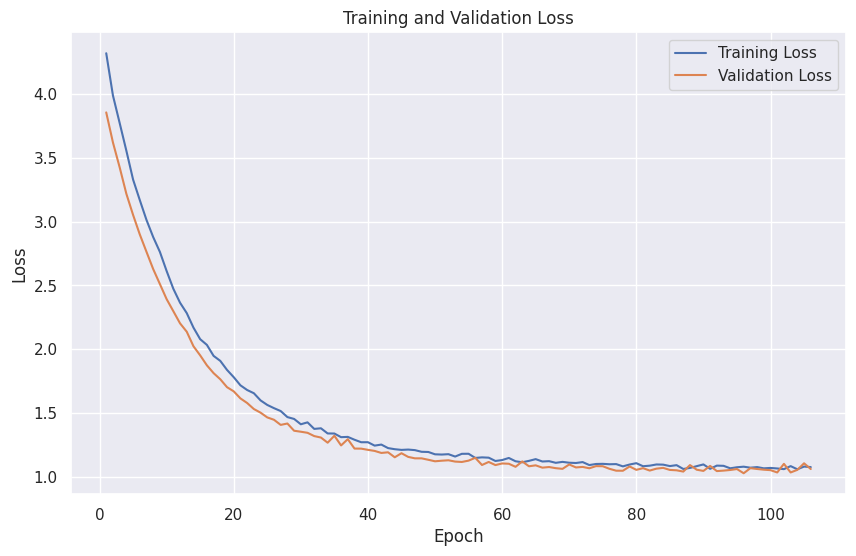

In [47]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [48]:
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


W0000 00:00:1716768121.799067     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 2, 3,
       3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 4, 2, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4,
       3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       2, 3, 2, 3, 2, 4, 3, 2, 2, 3, 2, 3, 3, 3, 2,

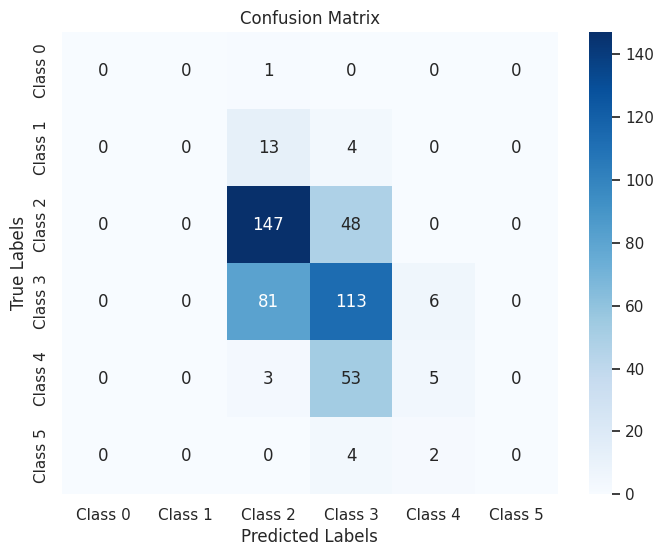

In [49]:
cm = confusion_matrix(y_test, predicted_classes)

class_labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #F08080; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> H2O AUTOML </div>

In [50]:
import h2o
from h2o.automl import H2OAutoML

In [51]:
h2o.init()
h2o_df = h2o.H2OFrame(df)
h2o_df

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx5s906ob
  JVM stdout: /tmp/tmpx5s906ob/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpx5s906ob/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,2 months and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_rkvqk1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.250 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


FIXED ACIDITY,VOLATILE ACIDITY,CITRIC ACID,RESIDUAL SUGAR,CHLORIDES,FREE SULFUR DIOXIDE,TOTAL SULFUR DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY,TOTAL ACIDITY,SULFUR DIOXIDE RATIO,CHLORIDE DENSITY,SUGAR TO ACIDITY RATIO,ALCOHOL DENSITY RATIO,PH BALANCE,SULPHATES TO TOTAL ACIDITY RATIO,RESIDUAL SUGAR TO PH RATIO,FREE SULFUR DIOXIDE TO TOTAL ACIDITY RATIO,DENSITY TO PH RATIO,ALCOHOL TO SULPHATES RATIO,CHLORIDES TO RESIDUAL SUGAR RATIO,VOLATILE ACIDITY TO FIXED ACIDITY RATIO,RESIDUAL SUGAR TO TOTAL SULFUR DIOXIDE RATIO,TOTAL SULFUR DIOXIDE TO DENSITY RATIO
0.247788,0.39726,0,0.105652,0.287964,0.140845,0.108632,0.567548,0.606299,0.178295,0.153846,2,0.24034,0.360494,0.286747,0.085962,0.157039,0.284779,0.203539,0.080076,0.11317,0.3133,0.374437,0.184009,0.416989,0.048022,0.108097
0.283186,0.520548,0,0.179609,0.386952,0.338028,0.236663,0.494126,0.362205,0.271318,0.215385,2,0.289597,0.419943,0.385891,0.129155,0.219818,0.250902,0.255543,0.169789,0.250605,0.545427,0.293505,0.171876,0.510688,0.0308034,0.235781
0.283186,0.438356,0.04,0.147913,0.359955,0.197183,0.186227,0.508811,0.409449,0.248062,0.215385,2,0.282803,0.305664,0.358862,0.107817,0.219517,0.266537,0.239953,0.134399,0.148037,0.49707,0.316182,0.184009,0.431596,0.0346216,0.185491
0.584071,0.109589,0.56,0.105652,0.283465,0.225352,0.209505,0.582232,0.330709,0.193798,0.215385,3,0.574947,0.312322,0.282193,0.0349314,0.218012,0.599425,0.0851095,0.0999099,0.11804,0.582282,0.378216,0.181242,0.0592075,0.0236047,0.208446
0.247788,0.39726,0,0.105652,0.287964,0.140845,0.108632,0.567548,0.606299,0.178295,0.153846,2,0.24034,0.360494,0.286747,0.085962,0.157039,0.284779,0.203539,0.080076,0.11317,0.3133,0.374437,0.184009,0.416989,0.048022,0.108097
0.247788,0.369863,0,0.0950872,0.283465,0.169014,0.131911,0.567548,0.606299,0.178295,0.153846,2,0.236943,0.362257,0.28226,0.0784877,0.157039,0.284779,0.205477,0.0706511,0.136183,0.3133,0.374437,0.192771,0.3892,0.037049,0.131265
0.292035,0.328767,0.06,0.0739567,0.256468,0.197183,0.205626,0.464758,0.440945,0.100775,0.153846,2,0.279406,0.277452,0.255776,0.0542828,0.159063,0.287986,0.116552,0.0613976,0.148773,0.463915,0.49884,0.200438,0.321135,0.0190188,0.204951
0.238938,0.363014,0,0.0316957,0.23847,0.197183,0.0581959,0.332599,0.511811,0.108527,0.246154,4,0.227601,0.828794,0.238334,0.0303683,0.253877,0.243786,0.146952,0.0181055,0.160913,0.391045,0.527539,0.258488,0.388439,0.049293,0.0581602
0.283186,0.315068,0.02,0.116218,0.274466,0.112676,0.0465567,0.494126,0.488189,0.186047,0.169231,4,0.265817,0.571984,0.273616,0.0883069,0.173818,0.292597,0.196315,0.0979158,0.087294,0.418961,0.370379,0.165608,0.312959,0.103711,0.046385
0.256637,0.260274,0.36,0.549392,0.265467,0.225352,0.372454,0.567548,0.480315,0.364341,0.323077,2,0.26242,0.172503,0.264314,0.415103,0.32554,0.256415,0.353576,0.503378,0.174158,0.429056,0.249637,0.0349056,0.273413,0.0519762,0.370669


In [52]:
X = list(h2o_df.columns[:-1])
y = 'QUALITY'

In [53]:
h2o_automl = H2OAutoML(max_models=15, seed=1,
                       keep_cross_validation_models=True,
                       keep_cross_validation_predictions=True,
                       keep_cross_validation_fold_assignment=True)
h2o_automl.train(x=X, y=y, training_frame=h2o_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/15
# GBM base models (used / total),1/6
# XGBoost base models (used / total),5/5
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [54]:
best_model = h2o_automl.leader
print(best_model.model_id)

StackedEnsemble_AllModels_1_AutoML_1_20240527_00212


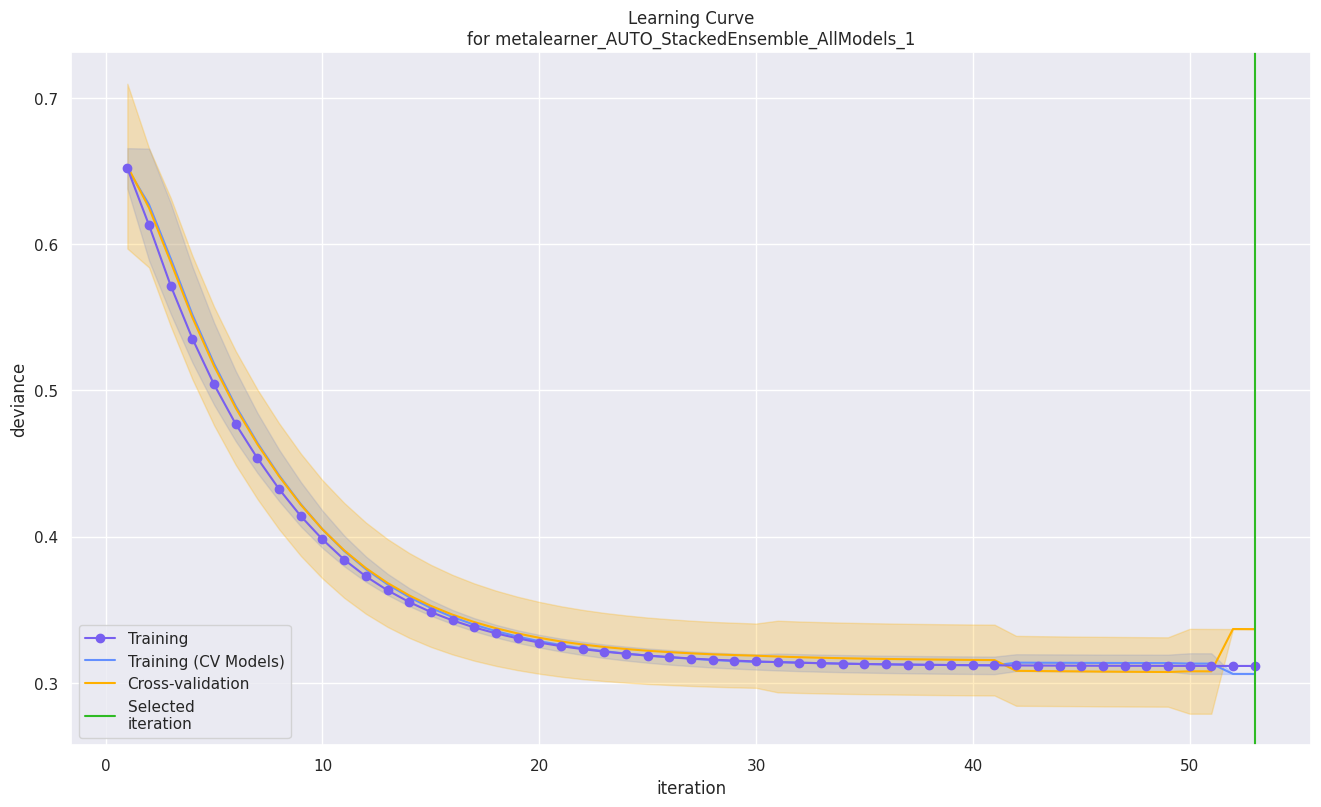

In [55]:
learning_curve_plot = best_model.learning_curve_plot()

In [56]:
train, valid = h2o_df.split_frame(ratios=[0.8])

predictions = best_model.predict(valid)
performance = best_model.model_performance(valid)

print(performance)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.0260114667496506
RMSE: 0.16128070792767063
MAE: 0.11481530902568769
RMSLE: 0.06269148064006279
Mean Residual Deviance: 0.0260114667496506
R^2: 0.9595129616346271
Null degrees of freedom: 336
Residual degrees of freedom: 327
Null deviance: 216.82761740158887
Residual deviance: 8.765864294632252
AIC: -251.4218303718668


In [57]:
performance = best_model.model_performance(valid)
classification_report = performance.show()
print(classification_report)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.0260114667496506
RMSE: 0.16128070792767063
MAE: 0.11481530902568769
RMSLE: 0.06269148064006279
Mean Residual Deviance: 0.0260114667496506
R^2: 0.9595129616346271
Null degrees of freedom: 336
Residual degrees of freedom: 327
Null deviance: 216.82761740158887
Residual deviance: 8.765864294632252
AIC: -251.4218303718668

None


In [58]:
h2o.cluster().shutdown()

H2O session _sid_80cc closed.
